# Military Power Clustering Project
-World military power
Source : globalfirepower.com on 1st may 2020

- https://data.world/vizzup/world-military-power/workspace/file?filename=World+military+power.xlsx


# Import Libraries

In [116]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
# plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")

import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

import missingno as msno

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# Ingest Data  

In [42]:
military = pd.read_excel("World military power.xlsx", skiprows=1)
military.head()

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,Trainer Aircraft Fleet value,Helicopter Fleet Strength,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength,Attack Helicopter Fleet Strength value,Tank Strength,Tank Strength value,AFV/APC Strength,AFV/APC Strength value,Self-Propelled Artillery Strength,Self-Propelled Artillery Strength value,Towed Artillery Strength,Towed Artillery Strength value,Rocket Projector Strength,Rocket Projector Strength value,Navy Fleet Strengths,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength,Submarine Fleet Strength value,Destroyer Fleet Strength,Destroyer Fleet Strength value,Frigate Fleet Strength,Frigate Fleet Strength value,defense spending budget,defense spending budget value,External Debt,External Debt value,Airport Totals,Airport Totals value,Oil Production,Oil Production value,Oil Consumption,Oil Consumption value,Proven Oil Reserves,Proven Oil Reserves value,Available Manpower,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
0,Afghanistan,1.344,Afghanistan,260,Afghanistan,0,Afghanistan,25,Afghanistan,30,Afghanistan,0,Afghanistan,187,Afghanistan,0,Afghanistan,0,Afghanistan,1062,Afghanistan,0,Afghanistan,176,Afghanistan,50,Afghanistan,0.000,Afghanistan,0.000,Afghanistan,0.000,Afghanistan,0.000,Afghanistan,0.000,Afghanistan,"12,00,00,00,000",Afghanistan,"2,84,00,00,000",Afghanistan,43,Afghanistan,0,Afghanistan,5500,Afghanistan,0,Afghanistan,"1,43,25,743",Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0,Afghanistan,1200,Afghanistan,5987.000
1,Albania,2.314,Albania,19,Albania,0,Albania,0,Albania,0,Albania,0,Albania,19,Albania,0,Albania,0,Albania,467,Albania,0,Albania,0,Albania,0,Albania,38.000,Albania,0.000,Albania,0.000,Albania,0.000,Albania,0.000,Albania,"25,00,00,000",Albania,"9,50,50,00,000",Albania,4,Albania,16000,Albania,42500,Albania,"16,83,00,000",Albania,"15,19,438",Albania,"30,57,220",Albania,28748,Albania,362,Albania,41,Albania,691.000
2,Algeria,0.466,Algeria,551,Algeria,103,Algeria,22,Algeria,59,Algeria,87,Algeria,257,Algeria,45,Algeria,880,Algeria,7361,Algeria,320,Algeria,240,Algeria,316,Algeria,201.000,Algeria,0.000,Algeria,6.000,Algeria,0.000,Algeria,5.000,Algeria,"13,00,00,00,000",Algeria,"6,26,00,00,000",Algeria,157,Algeria,"13,06,000",Algeria,"3,25,000",Algeria,"12,20,00,00,000",Algeria,"2,07,41,263",Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998,Algeria,0,Algeria,6734.000
3,Angola,0.838,Angola,295,Angola,72,Angola,18,Angola,30,Angola,47,Angola,126,Angola,15,Angola,379,Angola,595,Angola,28,Angola,357,Angola,115,Angola,57.000,Angola,0.000,Angola,0.000,Angola,0.000,Angola,0.000,Angola,"7,00,00,00,000",Angola,"42,08,00,00,000",Angola,176,Angola,"16,66,000",Angola,82300,Angola,"8,27,30,00,000",Angola,"62,44,205",Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600,Angola,1300,Angola,5369.000
4,Argentina,0.652,Argentina,227,Argentina,24,Argentina,7,Argentina,9,Argentina,64,Argentina,100,Argentina,0,Argentina,370,Argentina,739,Argentina,83,Argentina,172,Argentina,26,Argentina,49.000,Argentina,0.000,Argentina,2.000,Argentina,4.000,Argentina,0.000,Argentina,"4,20,00,00,000",Argentina,"2,14,90,00,00,000",Argentina,1138,Argentina,"4,79,400",Argentina,"6,85,000",Argentina,"2,18,50,00,000",Argentina,"2,01,79,430",Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,4989,Argentina,11000,Argentina,11968.000


# EDA

## Implement basic steps to see how is your data looks like

In [43]:
military.shape

(138, 60)

In [44]:
military.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 60 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength                        138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength                        138 non-null    object 
 3   Aircraft Strength value                  138 non-null    int64  
 4   Fighter/Interceptor Strength             138 non-null    object 
 5   Fighter/Interceptor Strength value       138 non-null    int64  
 6   Attack Aircraft Strength                 138 non-null    object 
 7   Attack Aircraft Strength value           138 non-null    int64  
 8   Transport Aircraft Fleet Strength        138 non-null    object 
 9   Transport Aircraft Fleet Strength value  138 non-null    int64  
 10  Trainer Aircraft Fleet                   138 non-n

In [45]:
military.apply(lambda x: x.nunique())

Military Strength                          138
Military Strength Power Index              138
Aircraft Strength                          138
Aircraft Strength value                    113
Fighter/Interceptor Strength               138
Fighter/Interceptor Strength value          63
Attack Aircraft Strength                   138
Attack Aircraft Strength value              38
Transport Aircraft Fleet Strength          138
Transport Aircraft Fleet Strength value     49
Trainer Aircraft Fleet                     138
Trainer Aircraft Fleet value                77
Helicopter Fleet Strength                  138
Helicopter Fleet Strength value             97
Attack Helicopter Fleet Strength           138
Attack Helicopter Fleet Strength value      45
Tank Strength                              138
Tank Strength value                        106
AFV/APC Strength                           138
AFV/APC Strength value                     130
Self-Propelled Artillery Strength          138
Self-Propelle

In [46]:
military.duplicated().sum()

0

In [47]:
# 🔍sutun isimleri cagrilabilir olmadigi icin degistirildi.

military.rename(columns = lambda x: x.replace (' ', '_'), inplace = True)

## Detect and drop duplicated columns

In [48]:
def getDuplicateColumns(df):
    duplicateColumnNames = set()
    
    for x in range(df.shape[1]):
        col = df.iloc[:, x]
        for y in range(x + 1, df.shape[1]):
            otherCol = df.iloc[:, y]
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
                  
    return list(duplicateColumnNames)

In [49]:
col_duplicated = getDuplicateColumns(military)
col_duplicated 

['Trainer_Aircraft_Fleet',
 'Towed_Artillery_Strength',
 'Helicopter_Fleet_Strength',
 'External_Debt',
 'Submarine_Fleet_Strength',
 'Attack_Aircraft_Strength',
 'Rocket_Projector_Strength',
 'Self-Propelled_Artillery_Strength',
 'Attack_Helicopter_Fleet_Strength',
 'Proven_Oil_Reserves',
 'Fighter/Interceptor_Strength',
 'defense_spending_budget',
 'Oil_Consumption',
 'AFV/APC_Strength',
 'Transport_Aircraft_Fleet_Strength',
 'Aircraft_Strength',
 'Total_Square_Land_Area',
 'Total_Population',
 'Frigate_Fleet_Strength',
 'Oil_Production',
 'Total_Waterway_Coverage',
 'Destroyer_Fleet_Strength',
 'Tank_Strength',
 'Airport_Totals',
 'Available_Manpower']

In [50]:
military.drop(columns=col_duplicated,axis=0, inplace=True )

In [51]:
military.shape

(138, 35)

📌🔍birbirinin ayni olan sutunlari tespit edip, drop ettik.Sonuc olarak elimizde 35 sutunumuz kaldi..

📌Fakat hala bazi sutunlar duplicated ediyor, cunku ayni olup farkli satirlarinda NaN olan benzer sutunlar var.👇🏻

In [52]:
military[['Military_Strength','Navy_Fleet_Strengths','Aircraft_Carrier_Fleet_Strength','Total_Coastline_Coverage','Total_Border_Coverage']].sample(20)

,Military_Strength,Navy_Fleet_Strengths,Aircraft_Carrier_Fleet_Strength,Total_Coastline_Coverage,Total_Border_Coverage
87,North Korea,North Korea,North Korea,North Korea,North Korea
96,Poland,Poland,Poland,Poland,Poland
6,Australia,Australia,Australia,Australia,NaN
57,Japan,Japan,Japan,Japan,NaN
119,Taiwan,Taiwan,Taiwan,Taiwan,NaN
125,Turkmenistan,Turkmenistan,Turkmenistan,Turkmenistan,Turkmenistan
17,Brazil,Brazil,Brazil,Brazil,Brazil
3,Angola,Angola,Angola,Angola,Angola
84,Nicaragua,Nicaragua,Nicaragua,Nicaragua,Nicaragua
39,Finland,Finland,Finland,Finland,Finland


In [53]:
military[['Military_Strength','Navy_Fleet_Strengths','Aircraft_Carrier_Fleet_Strength','Total_Coastline_Coverage','Total_Border_Coverage']].isnull().sum()

Military_Strength                   0
Navy_Fleet_Strengths               14
Aircraft_Carrier_Fleet_Strength    23
Total_Coastline_Coverage           29
Total_Border_Coverage               9
dtype: int64

📌 yukardaki 5 sutunda birbirinin ayni, aradaki fark bazilarinin Nan degerlerinin olmasi.En az missing valueye sahip olan sutun disinda digerlerini drop etmeye karar verdim.


In [54]:
military.drop(columns=['Navy_Fleet_Strengths','Aircraft_Carrier_Fleet_Strength','Total_Coastline_Coverage','Total_Border_Coverage'],axis=0, inplace=True )

In [55]:
military.shape

(138, 31)

## Convert multi index columns to one level

## Check for missing values 

In [56]:
military.isnull().sum()

Military_Strength                           0
Military_Strength_Power_Index               0
Aircraft_Strength_value                     0
Fighter/Interceptor_Strength_value          0
Attack_Aircraft_Strength_value              0
Transport_Aircraft_Fleet_Strength_value     0
Trainer_Aircraft_Fleet_value                0
Helicopter_Fleet_Strength_value             0
Attack_Helicopter_Fleet_Strength_value      0
Tank_Strength_value                         0
AFV/APC_Strength_value                      0
Self-Propelled_Artillery_Strength_value     0
Towed_Artillery_Strength_value              0
Rocket_Projector_Strength_value             0
Navy_Fleet_Strengths_value                 14
Aircraft_Carrier_Fleet_Strength_value      23
Submarine_Fleet_Strength_value             23
Destroyer_Fleet_Strength_value             23
Frigate_Fleet_Strength_value               23
defense_spending_budget_value               0
External_Debt_value                         0
Airport_Totals_value              

In [57]:
def missing (military):
    missing_number = military.isnull().sum().sort_values(ascending=False)
    missing_percent = (military.isnull().sum()/military.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

missing(military)

,Missing_Number,Missing_Percent
Total_Coastline_Coverage_value,29,0.210
Aircraft_Carrier_Fleet_Strength_value,23,0.167
Frigate_Fleet_Strength_value,23,0.167
Destroyer_Fleet_Strength_value,23,0.167
Submarine_Fleet_Strength_value,23,0.167
Navy_Fleet_Strengths_value,14,0.101
Total_Border_Coverage_value,9,0.065
Helicopter_Fleet_Strength_value,0,0.000
Attack_Helicopter_Fleet_Strength_value,0,0.000
Total_Waterway_Coverage_value,0,0.000


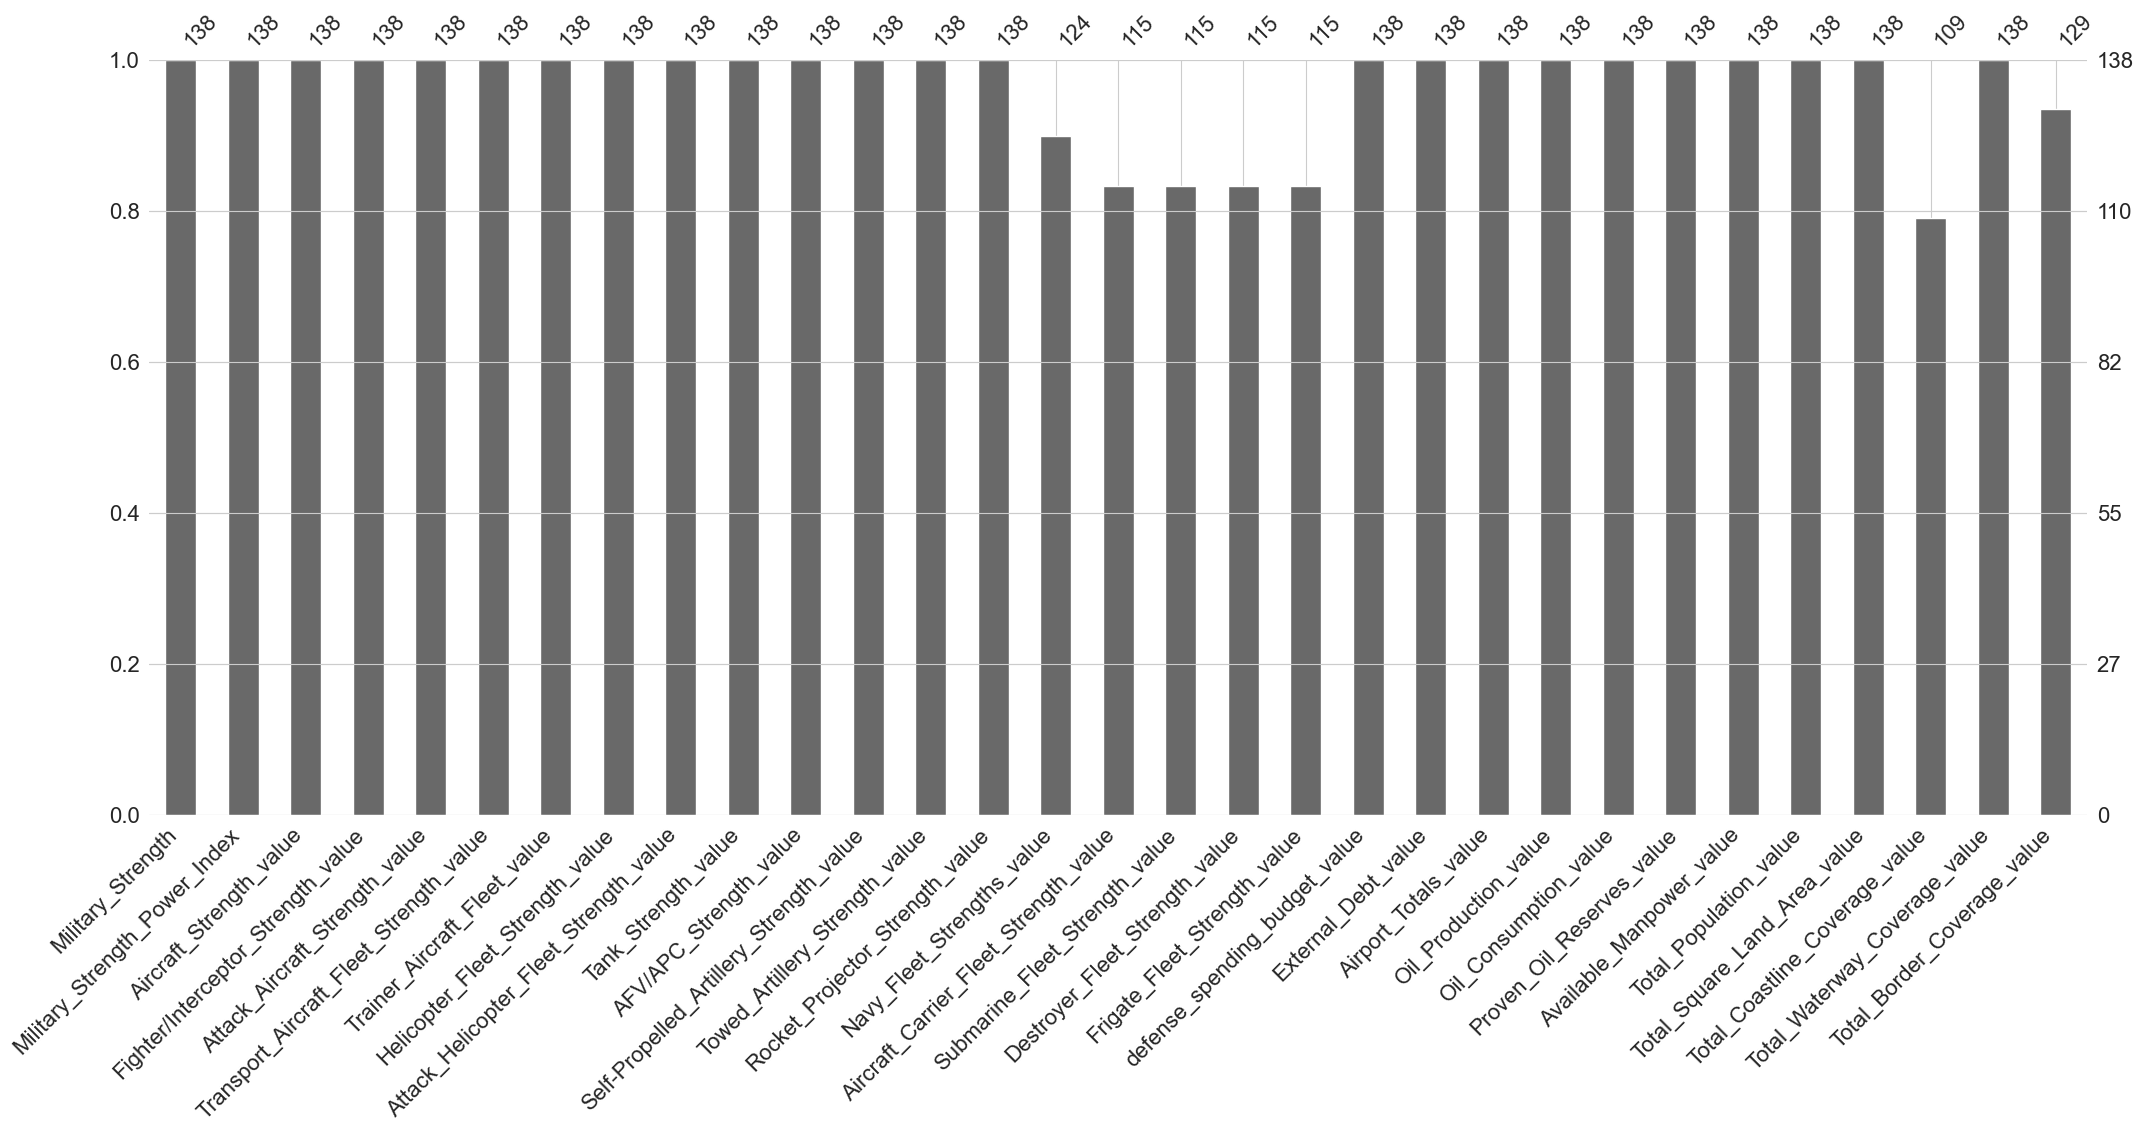

In [58]:
msno.bar(military);

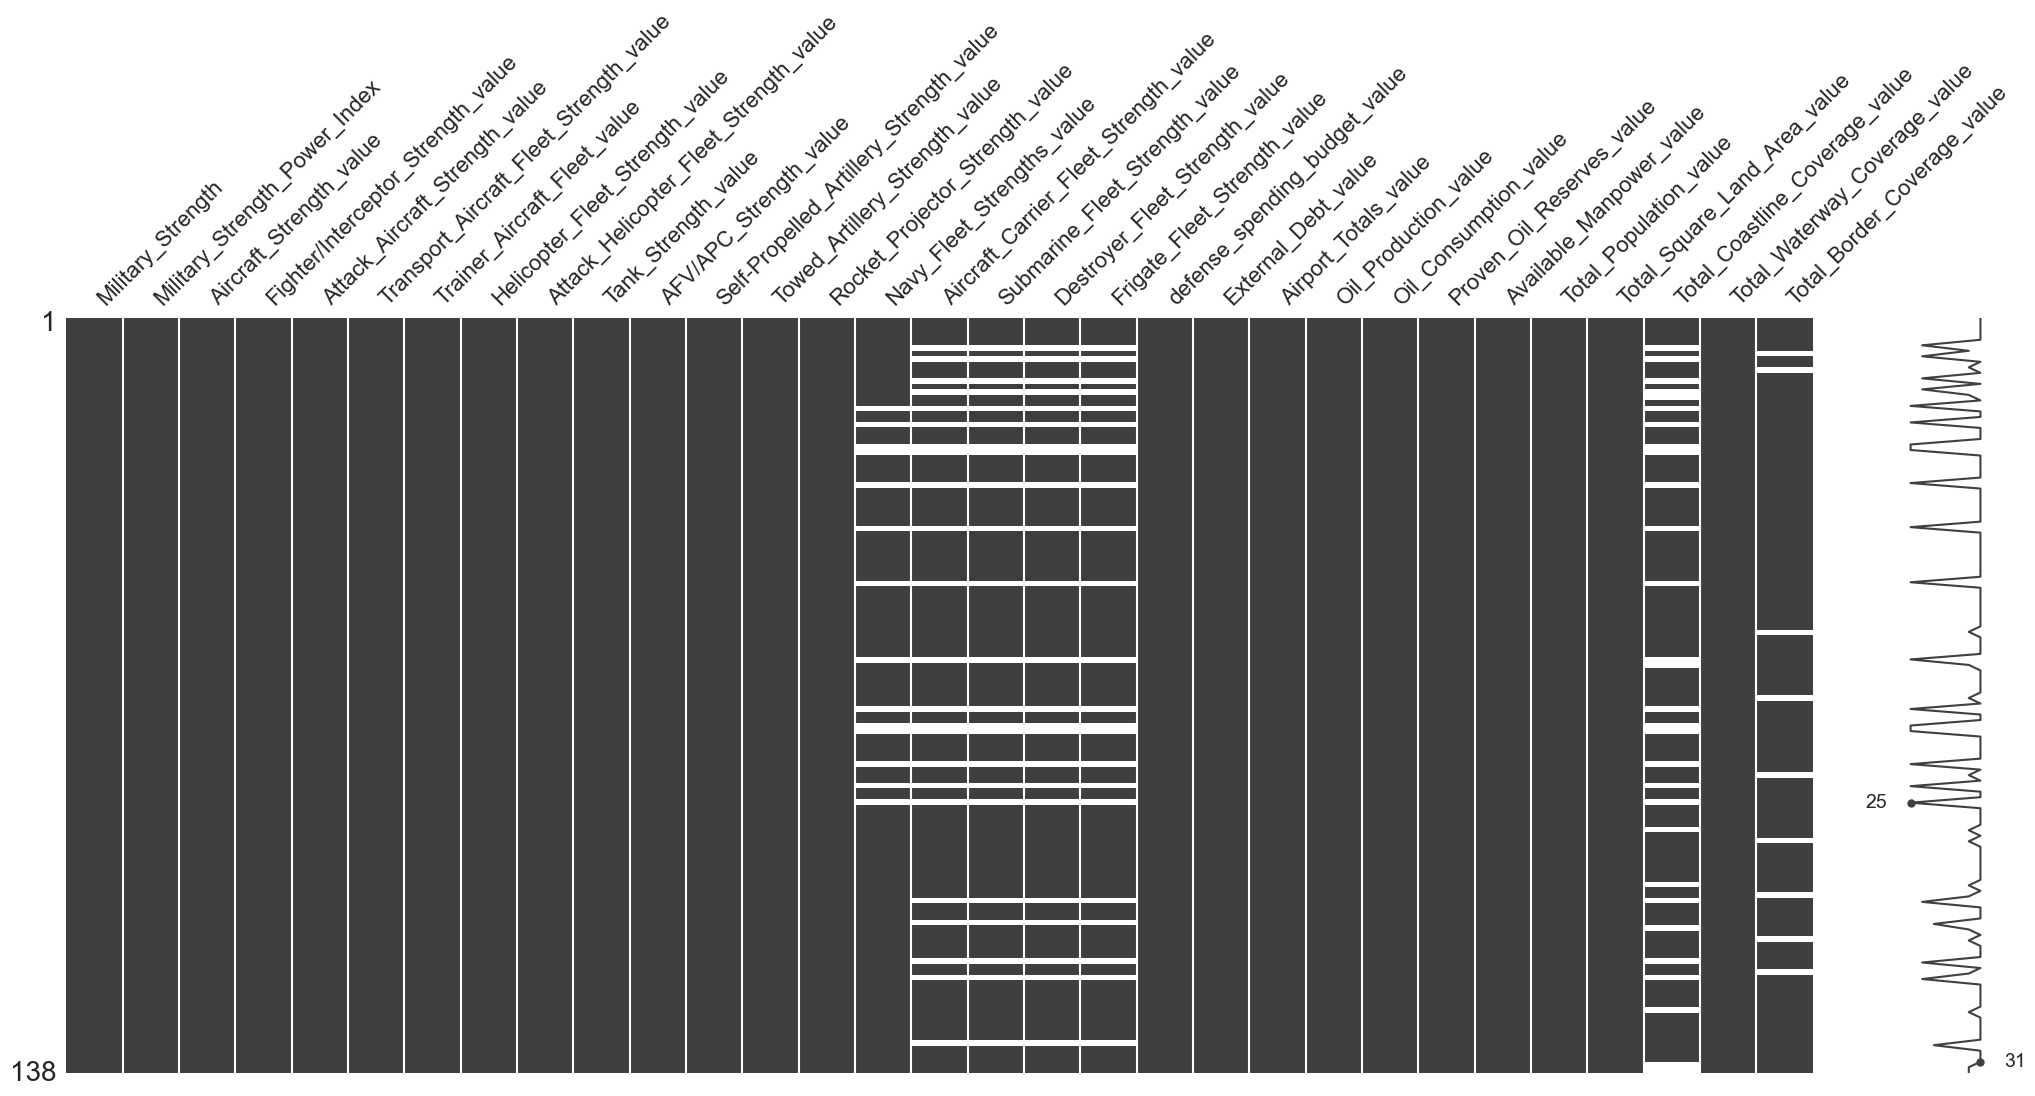

In [59]:
msno.matrix(military);

## Deal with missing values 
* Hint-1, use wikipedia to fill in missing values ​​comparing with similar countries
* Hint-2, Georeferences of countries can help you

In [60]:
missing_col = ['Military_Strength','Total_Coastline_Coverage_value','Aircraft_Carrier_Fleet_Strength_value','Frigate_Fleet_Strength_value','Destroyer_Fleet_Strength_value','Submarine_Fleet_Strength_value','Navy_Fleet_Strengths_value','Total_Border_Coverage_value']

In [61]:
military[['Aircraft_Carrier_Fleet_Strength_value','Submarine_Fleet_Strength_value','Destroyer_Fleet_Strength_value','Frigate_Fleet_Strength_value']].isna()

,Aircraft_Carrier_Fleet_Strength_value,Submarine_Fleet_Strength_value,Destroyer_Fleet_Strength_value,Frigate_Fleet_Strength_value
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
133,False,False,False,False
134,False,False,False,False
135,False,False,False,False
136,False,False,False,False


In [22]:
military[military.isna().any(axis=1)][['Military_Strength','Aircraft_Carrier_Fleet_Strength_value','Submarine_Fleet_Strength_value','Destroyer_Fleet_Strength_value','Frigate_Fleet_Strength_value']]




,Military_Strength,Aircraft_Carrier_Fleet_Strength_value,Submarine_Fleet_Strength_value,Destroyer_Fleet_Strength_value,Frigate_Fleet_Strength_value
5,Armenia,NaN,NaN,NaN,NaN
6,Australia,2.000,6.000,2.000,8.000
7,Austria,NaN,NaN,NaN,NaN
9,Bahrain,0.000,0.000,0.000,1.000
11,Belarus,NaN,NaN,NaN,NaN
13,Bhutan,NaN,NaN,NaN,NaN
14,Bolivia,0.000,0.000,0.000,0.000
16,Botswana,NaN,NaN,NaN,NaN
19,Burkina Faso,NaN,NaN,NaN,NaN
23,Central African Republic,NaN,NaN,NaN,NaN


In [63]:
#Nan olan ulkeler👇🏻

military[military[['Aircraft_Carrier_Fleet_Strength_value','Submarine_Fleet_Strength_value','Destroyer_Fleet_Strength_value','Frigate_Fleet_Strength_value']].isnull().any(axis=1)].Military_Strength.index

Int64Index([  5,   7,  11,  13,  16,  19,  23,  24,  30,  38,  48,  62,  71,
             74,  75,  81,  85,  88, 106, 110, 117, 120, 132],
           dtype='int64')

In [64]:
i = [  5,   7,  11,  13,  16,  19,  23,  24,  30,  38,  48,  62,  71,
             74,  75,  81,  85,  88, 106, 117, 120, 132]

In [65]:
#Georeferences ile alakali olan missing valulerin sebebi denize kiyisi olmayan ulkeler, gooegle arastirmasi sonucu 2020 yilinda South Korea haric diger NaN degerli ulkelerin degerleri 0 olarak buldum ve South Korea haric geri kalan lari 0 ile doldurdum.

military['Submarine_Fleet_Strength_value'].iloc[list(i)] = 0
military['Aircraft_Carrier_Fleet_Strength_value'].iloc[list(i)] = 0
military['Destroyer_Fleet_Strength_value'].iloc[list(i)] = 0
military['Frigate_Fleet_Strength_value'].iloc[list(i)] = 0

In [66]:
#South Korea

military['Submarine_Fleet_Strength_value'].iloc[110] = 22
military['Aircraft_Carrier_Fleet_Strength_value'].iloc[110] = 0
military['Destroyer_Fleet_Strength_value'].iloc[110] = 12
military['Frigate_Fleet_Strength_value'].iloc[110] = 13

In [67]:
military[military.Navy_Fleet_Strengths_value.isnull()][['Military_Strength','Navy_Fleet_Strengths_value']].index

Int64Index([16, 19, 23, 24, 30, 38, 48, 62, 71, 74, 75, 81, 85, 88], dtype='int64')

In [68]:
#Navy_Fleet_Strengths_value sutunundaki NaN 0 ile doldurdum..

military.Navy_Fleet_Strengths_value.fillna(0, inplace=True)

In [69]:
military[military.Total_Coastline_Coverage_value.isnull()][['Military_Strength','Total_Coastline_Coverage_value']]

,Military_Strength,Total_Coastline_Coverage_value
5,Armenia,NaN
7,Austria,NaN
11,Belarus,NaN
13,Bhutan,NaN
14,Bolivia,NaN
16,Botswana,NaN
19,Burkina Faso,NaN
23,Central African Republic,NaN
24,Chad,NaN
30,Czechia,NaN


In [70]:
#Total_Coastline_Coverage_value sutunundaki NaN 0 ile doldurdum..

military.Total_Coastline_Coverage_value.fillna(0, inplace=True)

In [71]:
military[military.Total_Border_Coverage_value.isnull()][['Military_Strength','Total_Border_Coverage_value']]

,Military_Strength,Total_Border_Coverage_value
6,Australia,NaN
9,Bahrain,NaN
57,Japan,NaN
69,Madagascar,NaN
83,New Zealand,NaN
95,Philippines,NaN
105,Singapore,NaN
113,Sri Lanka,NaN
119,Taiwan,NaN


In [72]:
#Total_Border_Coverage_value sutunundaki NaN 0 ile doldurdum..

military.Total_Border_Coverage_value.fillna(0, inplace=True)

In [73]:
military.isnull().sum()

Military_Strength                          0
Military_Strength_Power_Index              0
Aircraft_Strength_value                    0
Fighter/Interceptor_Strength_value         0
Attack_Aircraft_Strength_value             0
Transport_Aircraft_Fleet_Strength_value    0
Trainer_Aircraft_Fleet_value               0
Helicopter_Fleet_Strength_value            0
Attack_Helicopter_Fleet_Strength_value     0
Tank_Strength_value                        0
AFV/APC_Strength_value                     0
Self-Propelled_Artillery_Strength_value    0
Towed_Artillery_Strength_value             0
Rocket_Projector_Strength_value            0
Navy_Fleet_Strengths_value                 0
Aircraft_Carrier_Fleet_Strength_value      0
Submarine_Fleet_Strength_value             0
Destroyer_Fleet_Strength_value             0
Frigate_Fleet_Strength_value               0
defense_spending_budget_value              0
External_Debt_value                        0
Airport_Totals_value                       0
Oil_Produc

## Fix the dtypes

In [74]:
military.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military_Strength                        138 non-null    object 
 1   Military_Strength_Power_Index            138 non-null    float64
 2   Aircraft_Strength_value                  138 non-null    int64  
 3   Fighter/Interceptor_Strength_value       138 non-null    int64  
 4   Attack_Aircraft_Strength_value           138 non-null    int64  
 5   Transport_Aircraft_Fleet_Strength_value  138 non-null    int64  
 6   Trainer_Aircraft_Fleet_value             138 non-null    int64  
 7   Helicopter_Fleet_Strength_value          138 non-null    int64  
 8   Attack_Helicopter_Fleet_Strength_value   138 non-null    int64  
 9   Tank_Strength_value                      138 non-null    int64  
 10  AFV/APC_Strength_value                   138 non-n

In [75]:
military.sample(10)

,Military_Strength,Military_Strength_Power_Index,Aircraft_Strength_value,Fighter/Interceptor_Strength_value,Attack_Aircraft_Strength_value,Transport_Aircraft_Fleet_Strength_value,Trainer_Aircraft_Fleet_value,Helicopter_Fleet_Strength_value,Attack_Helicopter_Fleet_Strength_value,Tank_Strength_value,AFV/APC_Strength_value,Self-Propelled_Artillery_Strength_value,Towed_Artillery_Strength_value,Rocket_Projector_Strength_value,Navy_Fleet_Strengths_value,Aircraft_Carrier_Fleet_Strength_value,Submarine_Fleet_Strength_value,Destroyer_Fleet_Strength_value,Frigate_Fleet_Strength_value,defense_spending_budget_value,External_Debt_value,Airport_Totals_value,Oil_Production_value,Oil_Consumption_value,Proven_Oil_Reserves_value,Available_Manpower_value,Total_Population_value,Total_Square_Land_Area_value,Total_Coastline_Coverage_value,Total_Waterway_Coverage_value,Total_Border_Coverage_value
84,Nicaragua,2.275,19,0,0,5,1,14,0,104,265,0,654,163,30.000,0.000,0.000,0.000,0.000,"14,00,00,000","11,31,00,00,000",147,0,35000,0,"30,30,436","60,85,213","1,30,370",910,2220,1253.000
96,Poland,0.340,457,91,0,49,104,176,30,1069,2547,547,0,180,87.000,0.000,3.000,0.000,2.000,"12,00,00,00,000","2,41,00,00,00,000",126,20070,"5,85,000","13,78,00,000","1,88,26,137","3,84,20,687","3,12,685",440,3997,2845.000
114,Sudan,1.302,190,46,38,22,11,73,43,690,400,10,0,0,18.000,0.000,0.000,0.000,0.000,"2,47,00,00,000","56,05,00,00,000",74,"1,02,300",96800,"5,00,00,00,000","2,40,61,430","4,31,20,843","18,61,484",853,1723,6819.000
87,North Korea,0.372,949,458,114,4,169,204,20,6045,10000,800,1000,2110,984.000,0.000,83.000,0.000,11.000,"1,60,00,00,000","5,00,00,00,000",82,0,15500,0,"1,30,45,878","2,53,81,085","1,20,538",2495,2250,1607.000
69,Madagascar,3.087,6,0,0,0,0,6,0,12,103,0,25,0,8.000,0.000,0.000,0.000,0.000,"11,50,00,000","4,08,90,00,000",83,0,18500,0,"1,01,45,026","2,56,83,610","5,87,040",4828,600,0.000
83,New Zealand,1.368,48,0,0,7,13,22,0,0,200,0,24,0,11.000,0.000,0.000,0.000,2.000,"4,30,00,00,000","91,62,00,00,000",123,31480,"1,50,000","5,69,00,000","21,15,989","45,45,627","2,67,710",15134,0,0.000
135,Yemen,1.241,169,77,0,8,21,61,14,620,615,20,85,150,30.000,0.000,0.000,0.000,0.000,"1,40,00,00,000","7,06,80,00,000",57,12260,"1,45,000","3,00,00,00,000","1,12,66,221","2,86,67,230","5,27,968",1906,0,1601.000
22,Canada,0.371,385,62,0,38,135,145,0,80,1973,0,133,0,64.000,0.000,4.000,0.000,12.000,"22,50,00,00,000","16,08,00,00,00,000",1467,"39,77,000","25,00,000","1,69,70,00,00,000","1,61,10,865","3,58,81,659","99,84,670","2,02,080",636,8893.000
99,Republic of the Congo,2.951,13,2,0,3,0,8,1,86,225,0,0,6,6.000,0.000,0.000,0.000,0.000,"71,50,00,000","4,60,50,00,000",27,"2,44,200","1,85,000","1,60,00,00,000","19,38,754","50,62,021","3,42,000",169,1120,5008.000
40,France,0.170,1229,269,0,121,187,589,62,528,6028,109,12,13,180.000,4.000,9.000,11.000,11.000,"41,50,00,00,000","53,60,00,00,00,000",464,15170,"16,00,000","7,23,50,000","3,01,11,868","6,73,64,357","6,43,801",4853,8501,4072.000


In [35]:
object_float = ['defense_spending_budget_value','External_Debt_value','Oil_Production_value','Oil_Consumption_value','Proven_Oil_Reserves_value','Proven_Oil_Reserves_value','Available_Manpower_value','Total_Population_value','Total_Square_Land_Area_value','Total_Coastline_Coverage_value','Total_Waterway_Coverage_value']

In [36]:
military[object_float].sample(20)

,defense_spending_budget_value,External_Debt_value,Oil_Production_value,Oil_Consumption_value,Proven_Oil_Reserves_value,Proven_Oil_Reserves_value,Available_Manpower_value,Total_Population_value,Total_Square_Land_Area_value,Total_Coastline_Coverage_value,Total_Waterway_Coverage_value
38,"35,00,00,000","26,05,00,00,000",0,55000,"4,28,000","4,28,000","4,11,43,474","10,83,86,391","11,04,300",0,"1,04,300"
97,"3,35,80,00,000","4,49,00,00,00,000",0,"2,65,000",0,0,"48,04,949","1,03,55,493",92090,1793,210
136,"4,00,00,000","11,66,00,00,000",0,21000,0,0,"61,66,905","1,64,45,079","7,52,618",0,2250
31,"10,00,00,000","4,96,30,00,000",19160,10500,"18,00,00,000","18,00,00,000","3,41,12,410","8,52,81,024","23,44,858",37,15000
110,"44,00,00,00,000","3,84,60,00,00,000",0,"28,00,000",0,0,"2,57,09,049","5,14,18,097",99720,2413,1600
21,"34,70,00,000","9,37,50,00,000",75720,32500,"20,00,00,000","20,00,00,000","94,87,157","2,56,40,965","4,75,440",400,0
120,"1,60,00,00,000","5,75,00,00,000",180,20500,"1,20,00,000","1,20,00,000","40,95,924","86,04,882","1,43,100",0,200
32,"4,76,00,00,000","4,84,80,00,00,000","1,37,100","1,62,000","49,06,00,000","49,06,00,000","25,90,457","58,09,502",43094,7314,400
61,"6,83,10,00,000","47,24,00,00,000","27,53,000","3,45,000","1,01,50,00,00,000","1,01,50,00,00,000","16,41,971","29,16,467",17818,499,0
5,"1,38,50,00,000","10,41,00,00,000",0,47500,0,0,"16,96,085","30,38,217",29743,0,0


In [102]:
military[object_float] = military[object_float].replace(to_replace=',', value='', regex=True).astype(float)

In [104]:
military.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military_Strength                        138 non-null    object 
 1   Military_Strength_Power_Index            138 non-null    float64
 2   Aircraft_Strength_value                  138 non-null    int64  
 3   Fighter/Interceptor_Strength_value       138 non-null    int64  
 4   Attack_Aircraft_Strength_value           138 non-null    int64  
 5   Transport_Aircraft_Fleet_Strength_value  138 non-null    int64  
 6   Trainer_Aircraft_Fleet_value             138 non-null    int64  
 7   Helicopter_Fleet_Strength_value          138 non-null    int64  
 8   Attack_Helicopter_Fleet_Strength_value   138 non-null    int64  
 9   Tank_Strength_value                      138 non-null    int64  
 10  AFV/APC_Strength_value                   138 non-n

## Drop the features that not affect military power
* Hint-1,  Georeferences not proper features

In [105]:
# 👇🏻 Bu sutunlar Cografya bilgisi icerdiginden ve Askeri Guce referans olmayacagi icin drop ediyorum.

military.drop(columns=['Total_Square_Land_Area_value', 'Total_Coastline_Coverage_value','Total_Waterway_Coverage_value', 'Total_Border_Coverage_value'],axis=0, inplace=True )

In [106]:
military.shape

(138, 27)

In [107]:
military.head()

,Military_Strength,Military_Strength_Power_Index,Aircraft_Strength_value,Fighter/Interceptor_Strength_value,Attack_Aircraft_Strength_value,Transport_Aircraft_Fleet_Strength_value,Trainer_Aircraft_Fleet_value,Helicopter_Fleet_Strength_value,Attack_Helicopter_Fleet_Strength_value,Tank_Strength_value,AFV/APC_Strength_value,Self-Propelled_Artillery_Strength_value,Towed_Artillery_Strength_value,Rocket_Projector_Strength_value,Navy_Fleet_Strengths_value,Aircraft_Carrier_Fleet_Strength_value,Submarine_Fleet_Strength_value,Destroyer_Fleet_Strength_value,Frigate_Fleet_Strength_value,defense_spending_budget_value,External_Debt_value,Airport_Totals_value,Oil_Production_value,Oil_Consumption_value,Proven_Oil_Reserves_value,Available_Manpower_value,Total_Population_value
0,Afghanistan,1.344,260,0,25,30,0,187,0,0,1062,0,176,50,0.000,0.000,0.000,0.000,0.000,12000000000.000,2840000000.000,43,0.000,5500.000,0.000,14325743.000,34940837.000
1,Albania,2.314,19,0,0,0,0,19,0,0,467,0,0,0,38.000,0.000,0.000,0.000,0.000,250000000.000,9505000000.000,4,16000.000,42500.000,168300000.000,1519438.000,3057220.000
2,Algeria,0.466,551,103,22,59,87,257,45,880,7361,320,240,316,201.000,0.000,6.000,0.000,5.000,13000000000.000,6260000000.000,157,1306000.000,325000.000,12200000000.000,20741263.000,41657488.000
3,Angola,0.838,295,72,18,30,47,126,15,379,595,28,357,115,57.000,0.000,0.000,0.000,0.000,7000000000.000,42080000000.000,176,1666000.000,82300.000,8273000000.000,6244205.000,30355880.000
4,Argentina,0.652,227,24,7,9,64,100,0,370,739,83,172,26,49.000,0.000,2.000,4.000,0.000,4200000000.000,214900000000.000,1138,479400.000,685000.000,2185000000.000,20179430.000,44694198.000


## Visualy inspect the some features

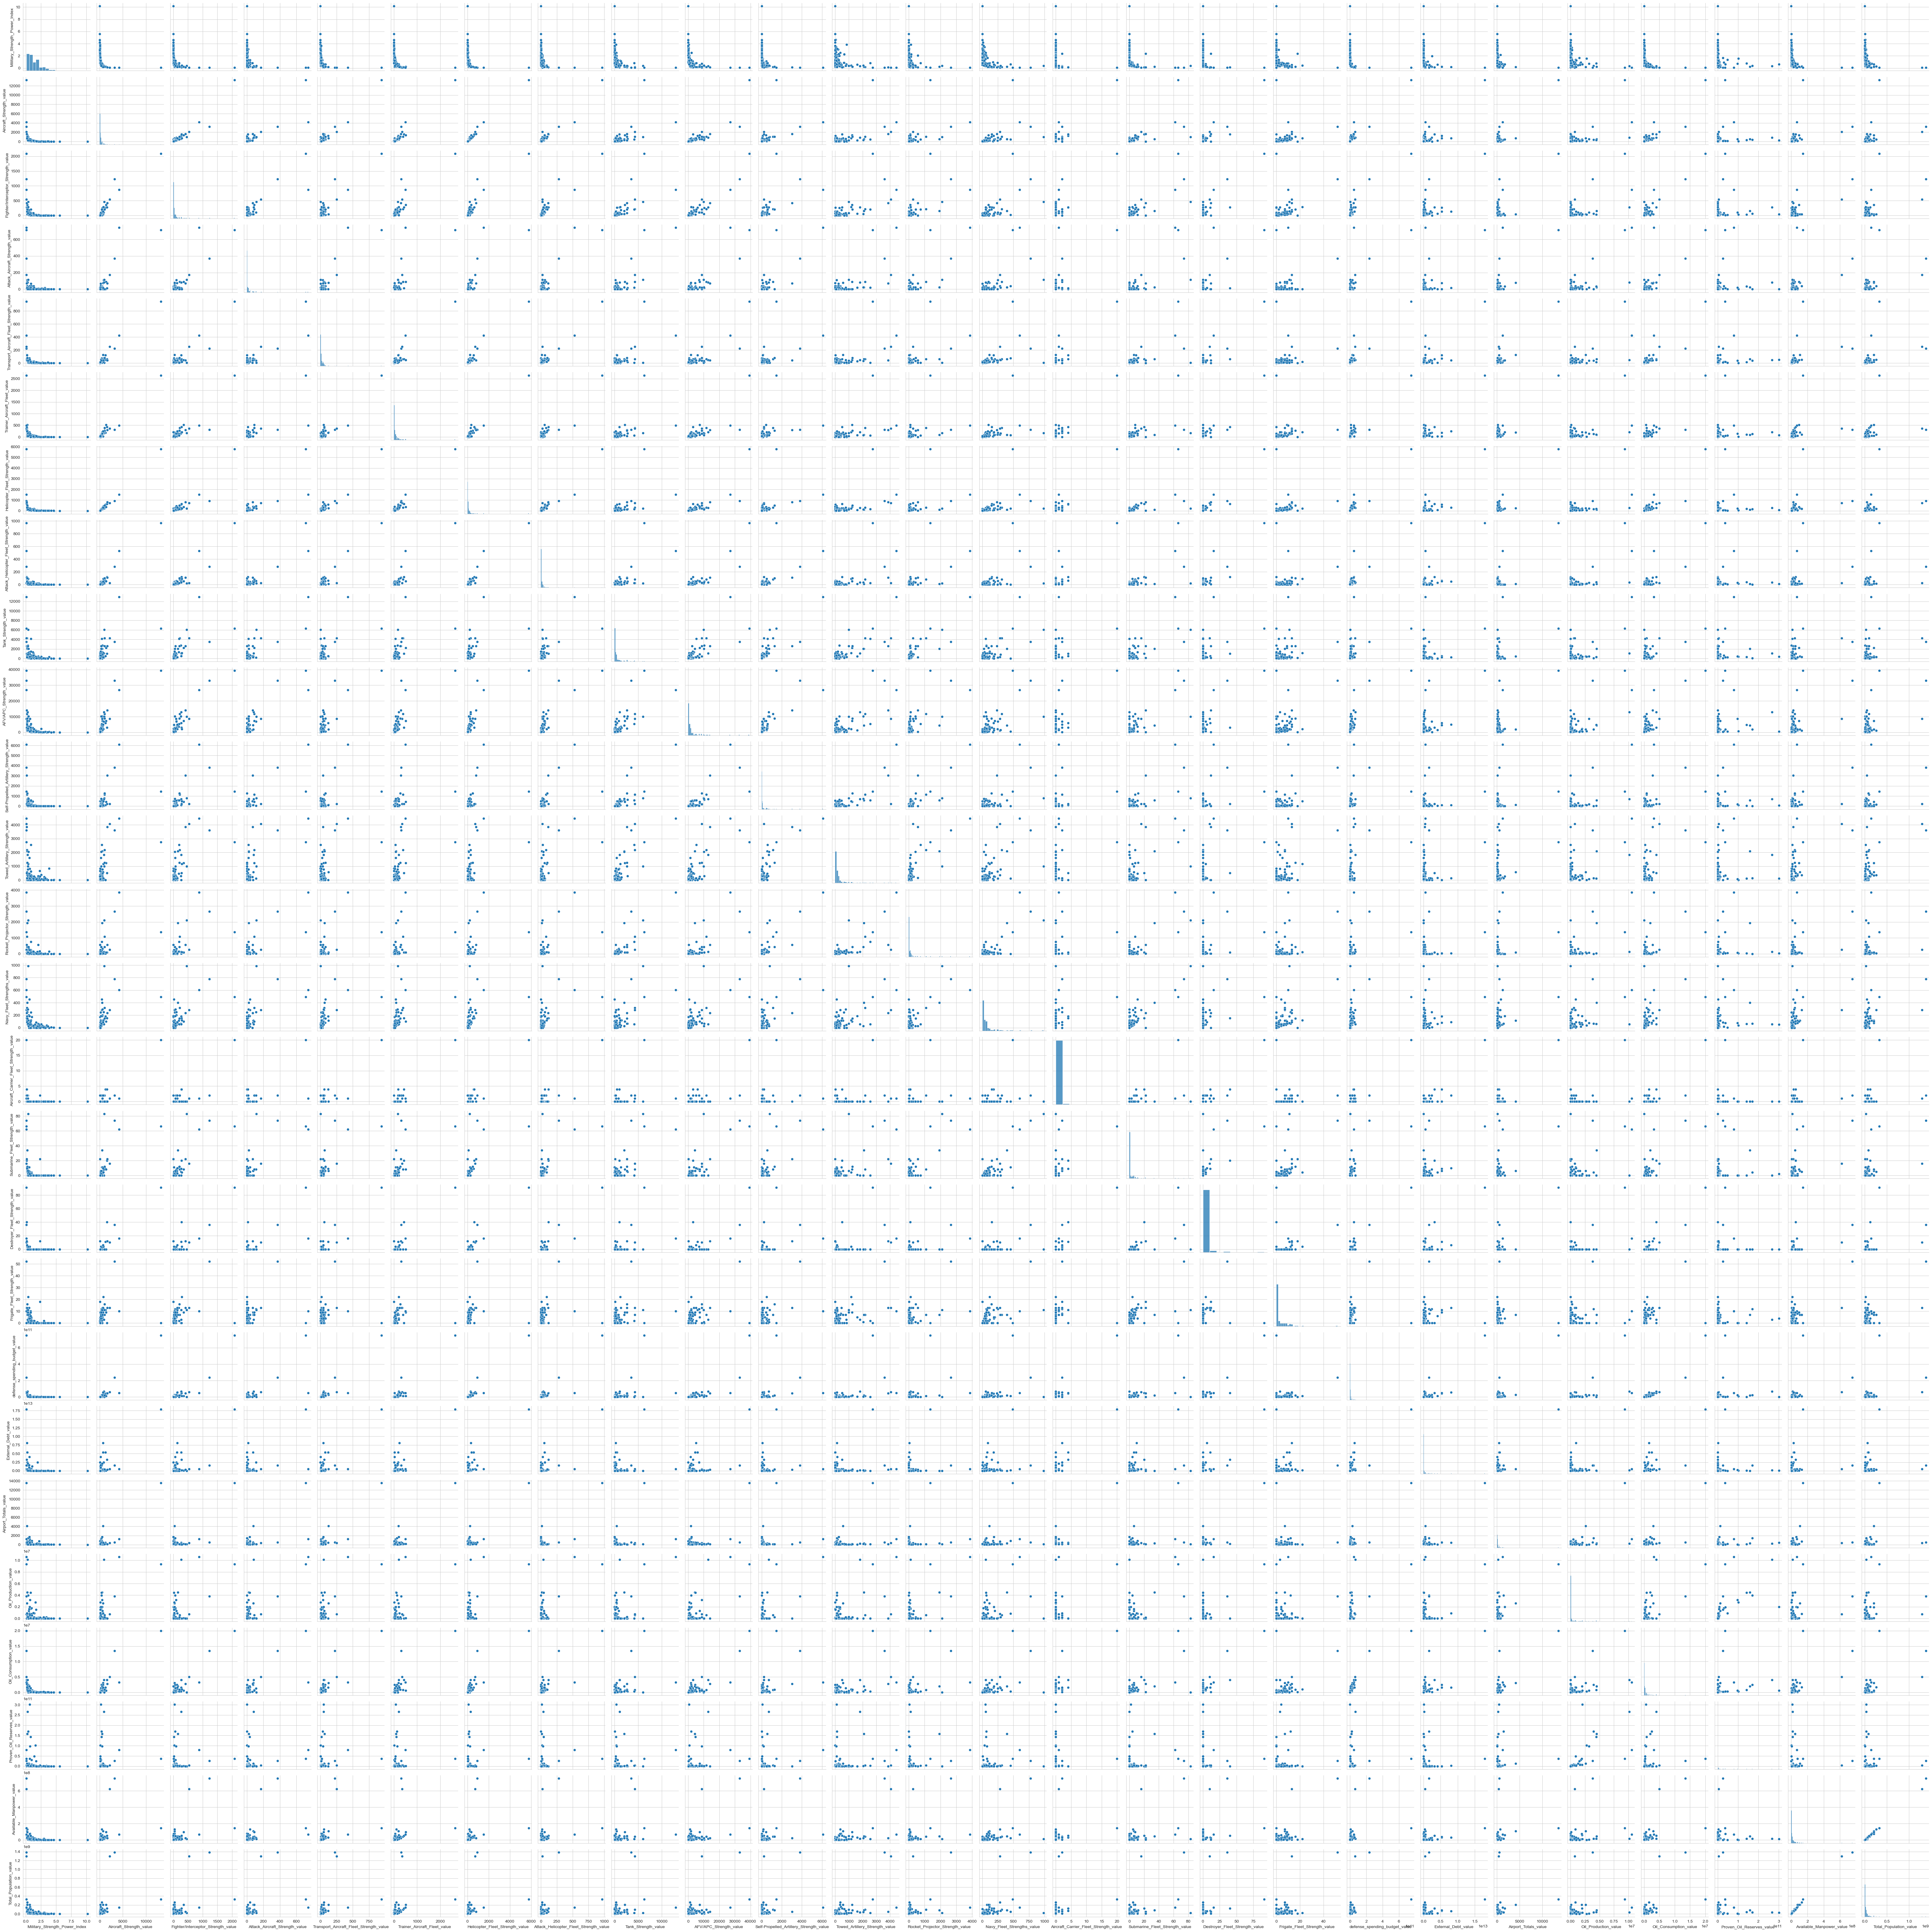

In [108]:
sns.pairplot(military)
plt.show()

In [117]:
military.iplot(kind='histogram',subplots=True,bins=50)

## Decriptive statistics

In [111]:
military.describe().T

,count,mean,std,min,25%,50%,75%,max
Military_Strength_Power_Index,138.000,1.461,1.324,0.061,0.575,1.034,2.022,10.168
Aircraft_Strength_value,138.000,388.471,1231.982,0.000,33.000,111.000,290.250,13264.000
Fighter/Interceptor_Strength_value,138.000,81.565,230.325,0.000,0.000,17.000,60.500,2085.000
Attack_Aircraft_Strength_value,138.000,25.761,94.528,0.000,0.000,0.000,15.750,742.000
Transport_Aircraft_Fleet_Strength_value,138.000,30.232,92.330,0.000,3.000,9.000,26.000,945.000
Trainer_Aircraft_Fleet_value,138.000,82.833,240.804,0.000,4.250,26.000,79.250,2643.000
Helicopter_Fleet_Strength_value,138.000,154.065,520.184,0.000,15.250,44.000,126.750,5768.000
Attack_Helicopter_Fleet_Strength_value,138.000,25.623,97.326,0.000,0.000,2.000,17.750,967.000
Tank_Strength_value,138.000,646.565,1515.464,0.000,19.250,153.000,436.250,12950.000
AFV/APC_Strength_value,138.000,2485.696,5410.546,0.000,250.250,734.500,2000.000,39253.000


# Data Preprocessing

In [114]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [121]:
military.drop(columns='Military_Strength', inplace=True)

scaler = StandardScaler()
military_sc = scaler.fit_transform(military)

# Modelling

In [122]:
K_means = KMeans(n_clusters=8, random_state=42)

In [123]:
K_means.fit_predict(military)

array([0, 0, 0, 0, 0, 0, 3, 6, 0, 0, 0, 0, 3, 0, 0, 0, 0, 6, 0, 0, 0, 0,
       3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 5,
       0, 6, 0, 0, 0, 6, 6, 0, 0, 7, 0, 7, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 6, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 6, 0, 0, 0, 6, 0, 0, 0, 0,
       6, 0, 7, 0, 0, 0, 6, 3, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 4, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

## Hopkins Test 
#### Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express no clusterability, a score tending to 1 express an uniform distrubution so clustering can't be useful and  0 express  not an uniform distrubution hence clusterering can be useful.

In [125]:
#!pip install pyclustertend

In [126]:
from pyclustertend import hopkins

hopkins(military, military.shape[0])

0.06712176135978186

## Clustering with K-means

### Elbow Method 
### We use this method to find optimal k value by looking up to break point of graph. 

In [127]:
ssd = []

K = range(2,30)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(military)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

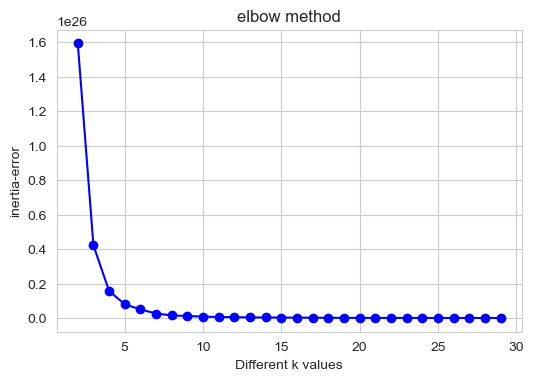

In [128]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

In [135]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,117083993126688212012498944.000
3,26403833943532565417689088.000
4,7726788567780654527283200.000
5,2972003613508538908803072.000
6,2370041298426397317922816.000
7,1098169168624674848899072.000
8,343409571680898246508544.000
9,339333594174293672984576.000
10,227591657387444282589184.000


<AxesSubplot:>

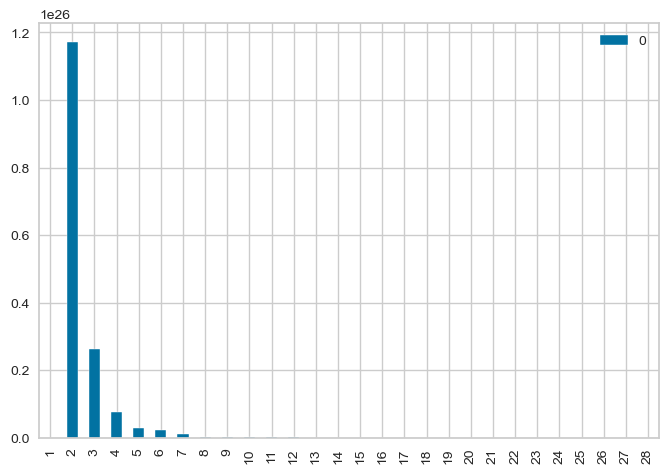

In [136]:
df_diff.plot(kind='bar')

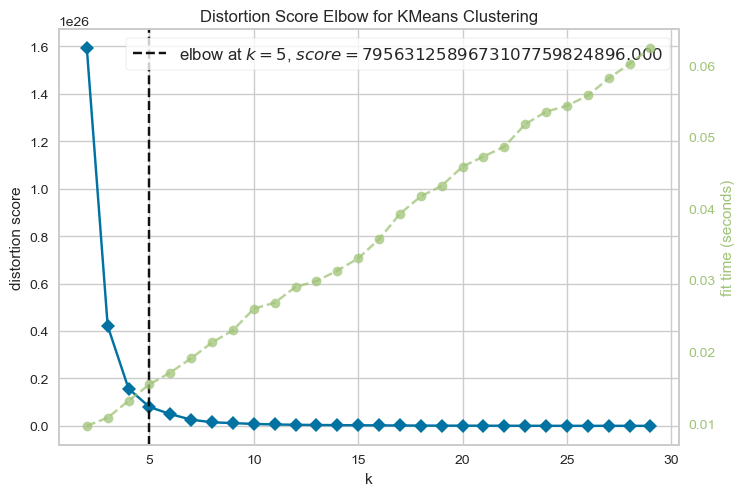

In [134]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,30))

visualizer.fit(military)        # Fit the data to the visualizer
visualizer.show();

### Silhouette analysis

In [137]:
from sklearn.metrics import silhouette_score

In [139]:
silhouette_score(military, K_means.labels_)

0.7847423624689158

In [141]:
range_n_clusters = range(2,10)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(military)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(military, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.9227153206161361
For n_clusters=3, the silhouette score is 0.8995442950406763
For n_clusters=4, the silhouette score is 0.8671436271577667
For n_clusters=5, the silhouette score is 0.8675195540884064
For n_clusters=6, the silhouette score is 0.7789462746208773
For n_clusters=7, the silhouette score is 0.7817947547149927
For n_clusters=8, the silhouette score is 0.7847423624689158
For n_clusters=9, the silhouette score is 0.6833747951570068


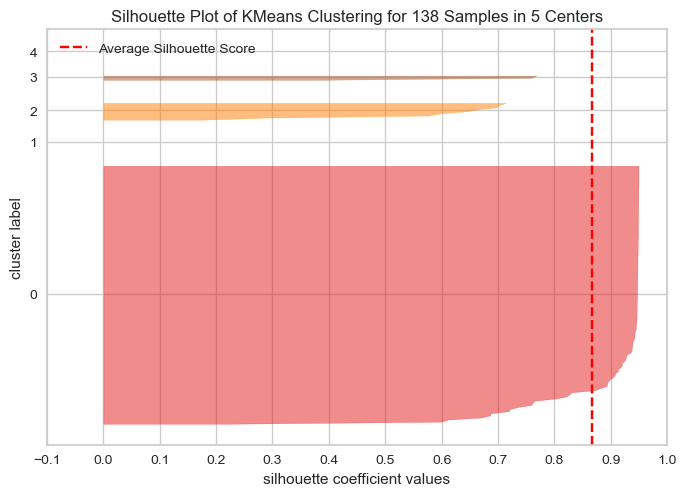

In [146]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=5, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(military)    # Fit the data to the visualizer
visualizer.poof();

### Building the model based on the optimal number of clusters

In [148]:
model = KMeans(n_clusters =3, random_state=42)
model.fit_predict(military)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

In [149]:
clusters = model.labels_

In [150]:
military["predicted_clusters"] = clusters

In [153]:
military.sample(20)

,Military_Strength_Power_Index,Aircraft_Strength_value,Fighter/Interceptor_Strength_value,Attack_Aircraft_Strength_value,Transport_Aircraft_Fleet_Strength_value,Trainer_Aircraft_Fleet_value,Helicopter_Fleet_Strength_value,Attack_Helicopter_Fleet_Strength_value,Tank_Strength_value,AFV/APC_Strength_value,Self-Propelled_Artillery_Strength_value,Towed_Artillery_Strength_value,Rocket_Projector_Strength_value,Navy_Fleet_Strengths_value,Aircraft_Carrier_Fleet_Strength_value,Submarine_Fleet_Strength_value,Destroyer_Fleet_Strength_value,Frigate_Fleet_Strength_value,defense_spending_budget_value,External_Debt_value,Airport_Totals_value,Oil_Production_value,Oil_Consumption_value,Proven_Oil_Reserves_value,Available_Manpower_value,Total_Population_value,predicted_clusters
39,0.850,194,55,0,11,105,127,0,200,2050,100,627,75,246.000,0.000,0.000,0.000,0.000,3570000000.000,150600000000.000,148,0.000,205000.000,0.000,2307420.000,5537364.000,0
80,3.282,30,6,0,3,14,7,2,7,410,0,50,4,8.000,0.000,0.000,0.000,0.000,505000000.000,7969000000.000,112,0.000,25000.000,0.000,582642.000,2533224.000,0
49,0.095,2123,538,172,250,359,722,23,4292,8686,235,4060,266,285.000,1.000,16.000,10.000,13.000,61000000000.000,501600000000.000,346,733900.000,5000000.000,4621000000.000,622480340.000,1296834042.000,0
31,1.139,53,2,4,13,0,34,8,175,100,16,120,57,20.000,0.000,0.000,0.000,0.000,100000000.000,4963000000.000,198,19160.000,10500.000,180000000.000,34112410.000,85281024.000,0
76,2.994,9,0,0,0,0,9,0,0,26,0,12,18,18.000,0.000,0.000,0.000,2.000,65000000.000,2516000000.000,5,0.000,4860.000,0.000,146191.000,614249.000,0
5,2.125,64,0,9,3,13,37,20,110,748,38,150,68,0.000,0.000,0.000,0.000,0.000,1385000000.000,10410000000.000,11,0.000,47500.000,0.000,1696085.000,3038217.000,0
52,0.791,348,26,33,16,102,186,40,309,4739,44,120,30,60.000,0.000,0.000,0.000,0.000,1730000000.000,73020000000.000,102,4454000.000,825000.000,142500000000.000,16399240.000,40194216.000,0
61,1.570,85,27,0,2,13,40,16,367,745,98,0,27,38.000,0.000,0.000,0.000,0.000,6831000000.000,47240000000.000,7,2753000.000,345000.000,101500000000.000,1641971.000,2916467.000,0
48,0.822,47,12,0,5,6,24,8,30,944,0,300,0,0.000,0.000,0.000,0.000,0.000,2080000000.000,138100000000.000,41,14000.000,145000.000,25100000.000,4618081.000,9825704.000,0
21,1.990,29,0,0,6,6,15,0,0,222,8,61,20,64.000,0.000,0.000,0.000,0.000,347000000.000,9375000000.000,33,75720.000,32500.000,200000000.000,9487157.000,25640965.000,0


### Model Building and label visualisation

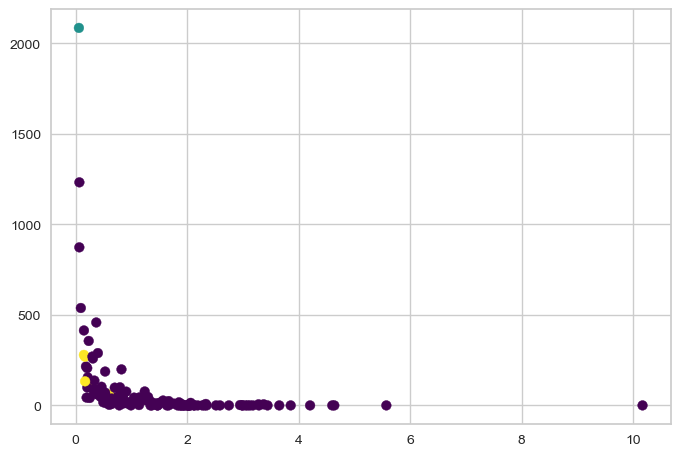

In [162]:
plt.scatter(military["Military_Strength_Power_Index"], military["Fighter/Interceptor_Strength_value"], c = military.predicted_clusters, cmap = "viridis")

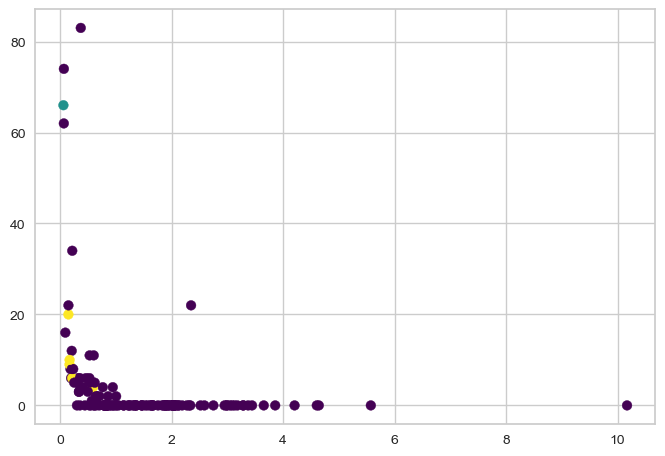

In [166]:
plt.scatter(military["Military_Strength_Power_Index"], military["Submarine_Fleet_Strength_value"], c = military.predicted_clusters, cmap = "viridis")

### Evaluate 

In [167]:
military.head()

,Military_Strength_Power_Index,Aircraft_Strength_value,Fighter/Interceptor_Strength_value,Attack_Aircraft_Strength_value,Transport_Aircraft_Fleet_Strength_value,Trainer_Aircraft_Fleet_value,Helicopter_Fleet_Strength_value,Attack_Helicopter_Fleet_Strength_value,Tank_Strength_value,AFV/APC_Strength_value,Self-Propelled_Artillery_Strength_value,Towed_Artillery_Strength_value,Rocket_Projector_Strength_value,Navy_Fleet_Strengths_value,Aircraft_Carrier_Fleet_Strength_value,Submarine_Fleet_Strength_value,Destroyer_Fleet_Strength_value,Frigate_Fleet_Strength_value,defense_spending_budget_value,External_Debt_value,Airport_Totals_value,Oil_Production_value,Oil_Consumption_value,Proven_Oil_Reserves_value,Available_Manpower_value,Total_Population_value,predicted_clusters
0,1.344,260,0,25,30,0,187,0,0,1062,0,176,50,0.000,0.000,0.000,0.000,0.000,12000000000.000,2840000000.000,43,0.000,5500.000,0.000,14325743.000,34940837.000,0
1,2.314,19,0,0,0,0,19,0,0,467,0,0,0,38.000,0.000,0.000,0.000,0.000,250000000.000,9505000000.000,4,16000.000,42500.000,168300000.000,1519438.000,3057220.000,0
2,0.466,551,103,22,59,87,257,45,880,7361,320,240,316,201.000,0.000,6.000,0.000,5.000,13000000000.000,6260000000.000,157,1306000.000,325000.000,12200000000.000,20741263.000,41657488.000,0
3,0.838,295,72,18,30,47,126,15,379,595,28,357,115,57.000,0.000,0.000,0.000,0.000,7000000000.000,42080000000.000,176,1666000.000,82300.000,8273000000.000,6244205.000,30355880.000,0
4,0.652,227,24,7,9,64,100,0,370,739,83,172,26,49.000,0.000,2.000,4.000,0.000,4200000000.000,214900000000.000,1138,479400.000,685000.000,2185000000.000,20179430.000,44694198.000,0


In [179]:
military.columns.get_values()

AttributeError: 'Index' object has no attribute 'get_values'

In [189]:
clus_pred = military.groupby("predicted_clusters").mean().T
clus_pred

predicted_clusters,0,1,2
Military_Strength_Power_Index,1.517,0.061,0.260
Aircraft_Strength_value,272.288,13264.000,880.600
Fighter/Interceptor_Strength_value,62.886,2085.000,174.000
Attack_Aircraft_Strength_value,20.742,715.000,20.400
Transport_Aircraft_Fleet_Strength_value,22.174,945.000,60.000
Trainer_Aircraft_Fleet_value,59.697,2643.000,181.600
Helicopter_Fleet_Strength_value,102.227,5768.000,399.800
Attack_Helicopter_Fleet_Strength_value,17.083,967.000,62.800
Tank_Strength_value,612.992,6289.000,404.400
AFV/APC_Strength_value,2147.621,39253.000,4057.400


<AxesSubplot:>

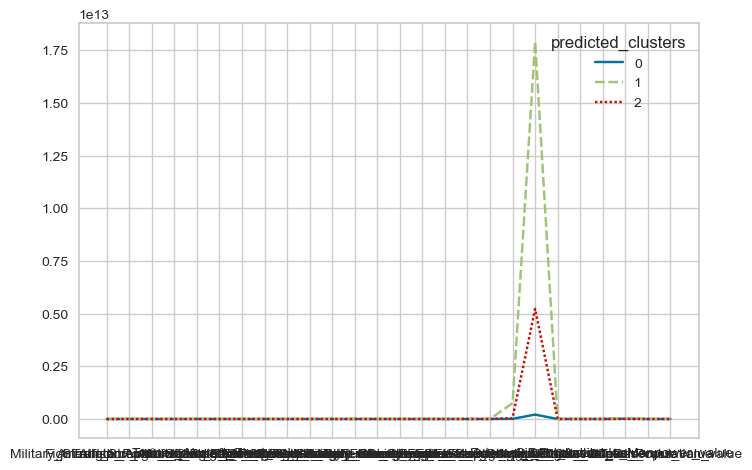

In [190]:
sns.lineplot(data = clus_pred)

In [ ]:
plt.scatter(df["petal_length"], df["petal_width"], c = df.predicted_clusters, cmap = "viridis")

## Hierarchical Clustering

### Dendogram

### Model Building and label visualisation

### Evaluate 